In [1]:
# required libs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import glob
import csv 

Data collecting and storing

In [2]:
!pip install pytrends

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [45]:
#Brought out two-letter country codes
response = requests.get('https://laendercode.net/en/2-letter-list.html')
response.encoding ='utf8'
page = BeautifulSoup(response.text, 'html.parser')
h = page.find_all('h4',class_ = 'margin-clear')
geos =[]
for i in range(len(h)):
    geos.append(h[i].text)
print(geos)
print(len(geos))

['AF', 'AX', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR', 'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BV', 'BR', 'IO', 'VG', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'TD', 'CL', 'CN', 'CX', 'CC', 'CO', 'KM', 'CK', 'CR', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK', 'DJ', 'DM', 'DO', 'TL', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'TF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT', 'HM', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL', 'IT', 'CI', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MK', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM', 'MD', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', 'NA', 'NR', 'NP', 'NL', 'AN', 'NC', 'NZ', 'NI', 'NE', 'NG', 'NU', 'NF', 'KP', 'MP', 'NO

In [4]:
def get_top(date, geo):
    data = pytrends.top_charts(date, hl='en-US', tz=300, geo=geo)
    data.drop('exploreQuery', axis=1, inplace= True)
    data['date'] = date
    data['geo'] = geo
    data['rating'] = range(1,11)
    return data

In [7]:
for geo in geos:
    for date in range(2005,2022):
        try:
            get_top(date,geo).to_csv(f'google_data/{geo}_{date}.csv')
        except:
            pass

In [46]:
# example
get_top(2019,'KR')

,title,date,geo,rating
0,타노스,2019,KR,1
1,정준영,2019,KR,2
2,설리,2019,KR,3
3,SKY 캐슬,2019,KR,4
4,한글날,2019,KR,5
5,황하나,2019,KR,6
6,고유정,2019,KR,7
7,조국,2019,KR,8
8,호텔 델루나,2019,KR,9
9,원펀맨 2기,2019,KR,10


In [50]:
#collected all data in one dataframe(df)
read_f  = glob.glob('google_data/*.csv')
df = pd.DataFrame()
for f in read_f:
    df1 = pd.read_csv(f)
    df = pd.concat([df,df1])
df

,Unnamed: 0,title,date,geo,rating
0,0,Dubai,2008,AE,1
1,1,UAE,2008,AE,2
2,2,الامارات,2008,AE,3
3,3,العاب,2008,AE,4
4,4,دبي,2008,AE,5
...,...,...,...,...,...
5,5,Edmund Kudzayi,2018,ZW,6
6,6,Winnie Mandela,2018,ZW,7
7,7,Mthuli Ncube,2018,ZW,8
8,8,Alexis Sanchez,2018,ZW,9


In [51]:
#save data to csv
df.to_csv('google_data.csv')

Data cleaning and feature engenering

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7150 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7150 non-null   int64 
 1   title       7150 non-null   object
 2   date        7150 non-null   int64 
 3   geo         7150 non-null   object
 4   rating      7150 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 335.2+ KB


In [53]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df

,title,date,geo,rating
0,Dubai,2008,AE,1
1,UAE,2008,AE,2
2,الامارات,2008,AE,3
3,العاب,2008,AE,4
4,دبي,2008,AE,5
...,...,...,...,...
5,Edmund Kudzayi,2018,ZW,6
6,Winnie Mandela,2018,ZW,7
7,Mthuli Ncube,2018,ZW,8
8,Alexis Sanchez,2018,ZW,9


In [14]:
print(f'Unique countries: {len(df.geo.unique())}')
print(df.geo.unique())

Unique countries: 80
['AE' 'AR' 'AT' 'AU' 'BD' 'BE' 'BG' 'BR' 'BY' 'CA' 'CH' 'CL' 'CN' 'CO'
 'CR' 'CZ' 'DE' 'DK' 'DO' 'EC' 'EE' 'EG' 'ES' 'FI' 'FR' 'GB' 'GH' 'GR'
 'GT' 'HK' 'HN' 'HR' 'HU' 'ID' 'IE' 'IL' 'IN' 'IT' 'JP' 'KE' 'KR' 'KZ'
 'LK' 'LT' 'LV' 'MM' 'MX' 'MY' 'NG' 'NL' 'NO' 'NZ' 'PA' 'PE' 'PH' 'PK'
 'PL' 'PR' 'PT' 'RO' 'RS' 'RU' 'SA' 'SE' 'SG' 'SI' 'SK' 'SN' 'SV' 'TH'
 'TR' 'TW' 'UA' 'UG' 'US' 'UY' 'VE' 'VN' 'ZA' 'ZW']


In [15]:
print(f'Unique years: {len(df.date.unique())}')
print(df.date.unique())

Unique years: 15
[2008 2009 2012 2013 2014 2015 2016 2017 2018 2019 2020 2011 2010 2006
 2007]


In [16]:
print(f'Unique titles: {len(df.title.unique())}')

Unique titles: 5422


In [54]:
df.groupby('geo').describe() 

date                                                                   \
     count         mean       std     min      25%     50%      75%     max   
geo                                                                           
AE   110.0  2014.636364  3.740989  2008.0  2012.00  2015.0  2018.00  2020.0   
AR   120.0  2014.333333  3.719884  2008.0  2011.75  2014.5  2017.25  2020.0   
AT   120.0  2014.333333  3.719884  2008.0  2011.75  2014.5  2017.25  2020.0   
AU   120.0  2014.333333  3.719884  2008.0  2011.75  2014.5  2017.25  2020.0   
BD    70.0  2016.000000  2.014441  2013.0  2014.00  2016.0  2018.00  2019.0   
..     ...          ...       ...     ...      ...     ...      ...     ...   
UY    80.0  2016.500000  2.305744  2013.0  2014.75  2016.5  2018.25  2020.0   
VE    10.0  2013.000000  0.000000  2013.0  2013.00  2013.0  2013.00  2013.0   
VN    90.0  2016.000000  2.596454  2012.0  2014.00  2016.0  2018.00  2020.0   
ZA   120.0  2014.333333  3.719884  2008.0  2011.75  2014.5  2017.25  2020.0   
ZW    20.0  2017.500000  0.512989  2017.0  2017.00  2017.5  2018.00  2018.0   

    rating                                             
     count mean       std  min   25%  50%   75%   max  
geo                                                    
AE   110.0  5.5  2.885427  1.0  3.00  5.5  8.00  10.0  
AR   120.0  5.5  2.884324  1.0  3.00  5.5  8.00  10.0  
AT   120.0  5.5  2.884324  1.0  3.00  5.5  8.00  10.0  
AU   120.0  5.5  2.884324  1.0  3.00  5.5  8.00  10.0  
BD    70.0  5.5  2.893020  1.0  3.00  5.5  8.00  10.0  
..     ...  ...       ...  ...   ...  ...   ...   ...  
UY    80.0  5.5  2.890403  1.0  3.00  5.5  8.00  10.0  
VE    10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0  
VN    90.0  5.5  2.888373  1.0  3.00  5.5  8.00  10.0  
ZA   120.0  5.5  2.884324  1.0  3.00  5.5  8.00  10.0  
ZW    20.0  5.5  2.946898  1.0  3.00  5.5  8.00  10.0  

[80 rows x 16 columns]

In [55]:
df.groupby('date').describe() 

rating                                           
      count mean       std  min   25%  50%   75%   max
date                                                  
2006   10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0
2007   10.0  5.5  3.027650  1.0  3.25  5.5  7.75  10.0
2008  350.0  5.5  2.876393  1.0  3.00  5.5  8.00  10.0
2009  470.0  5.5  2.875342  1.0  3.00  5.5  8.00  10.0
2010   20.0  5.5  2.946898  1.0  3.00  5.5  8.00  10.0
2011  490.0  5.5  2.875217  1.0  3.00  5.5  8.00  10.0
2012  550.0  5.5  2.874896  1.0  3.00  5.5  8.00  10.0
2013  690.0  5.5  2.874365  1.0  3.00  5.5  8.00  10.0
2014  620.0  5.5  2.874600  1.0  3.00  5.5  8.00  10.0
2015  610.0  5.5  2.874639  1.0  3.00  5.5  8.00  10.0
2016  620.0  5.5  2.874600  1.0  3.00  5.5  8.00  10.0
2017  670.0  5.5  2.874427  1.0  3.00  5.5  8.00  10.0
2018  680.0  5.5  2.874396  1.0  3.00  5.5  8.00  10.0
2019  690.0  5.5  2.874365  1.0  3.00  5.5  8.00  10.0
2020  670.0  5.5  2.874427  1.0  3.00  5.5  8.00  10.0

In [57]:
df['title_len'] = df.title.apply(lambda x: len(x))

In [58]:
df['title_word_count'] = df.title.apply(lambda x: len(x.split(' ')))

In [59]:
df

,title,date,geo,rating,title_len,title_word_count
0,Dubai,2008,AE,1,5,1
1,UAE,2008,AE,2,3,1
2,الامارات,2008,AE,3,8,1
3,العاب,2008,AE,4,5,1
4,دبي,2008,AE,5,3,1
...,...,...,...,...,...,...
5,Edmund Kudzayi,2018,ZW,6,14,2
6,Winnie Mandela,2018,ZW,7,14,2
7,Mthuli Ncube,2018,ZW,8,12,2
8,Alexis Sanchez,2018,ZW,9,14,2


In [60]:
#maximum number of words in a title
df[df.title_word_count == df.title_word_count.max()]

,title,date,geo,rating,title_len,title_word_count
6,30 aniversario de la caída del Muro de Berlín,2019,CR,7,45,9
2,30 aniversario de la caída del muro de Berlín,2019,GT,3,45,9
5,30 aniversario de la caída del Muro de Berlín,2019,PA,6,45,9
4,30 aniversario de la caída del Muro de Berlín,2019,PR,5,45,9


In [62]:
#maximum length of headers
df[df.title_len == df.title_len.max()]

,title,date,geo,rating,title_len,title_word_count
1,Kenya Universities and Colleges Central Placem...,2014,KE,2,66,8


In [64]:
#minimum length of headers
df[df.title_len == df.title_len.min()]

,title,date,geo,rating,title_len,title_word_count
9,茶,2012,CN,10,1,1
7,빙,2009,KR,8,1,1


In [65]:
df[df.title == 'Coronavirus'].date.value_counts()

2020    25
Name: date, dtype: int64

Visualization

In [66]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

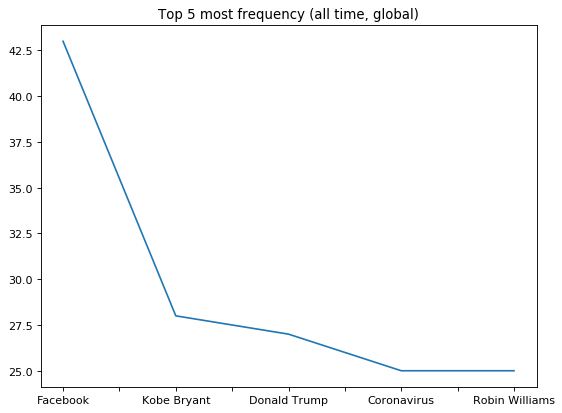

In [80]:
figure(figsize=(8, 6), dpi=80)
df.title.value_counts()[:5].plot(title = 'Top 5 most frequency (all time, global)');

Facebook              43
Kobe Bryant           28
Donald Trump          27
Coronavirus           25
Robin Williams        25
                      ..
离婚律师                   1
Street Parade 2012     1
余震                     1
Sean Penn              1
Αμφιπολη               1
Name: title, Length: 5422, dtype: int64


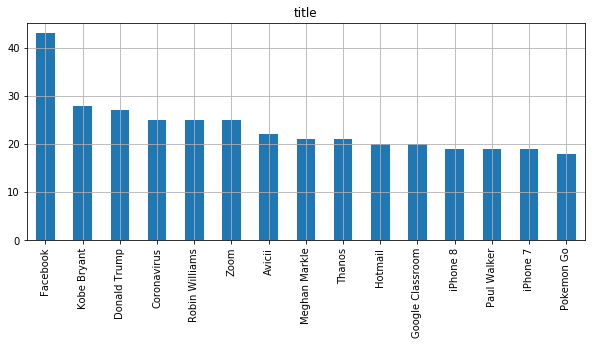

2019    690
2013    690
2018    680
2017    670
2020    670
2014    620
2016    620
2015    610
2012    550
2011    490
2009    470
2008    350
2010     20
2007     10
2006     10
Name: date, dtype: int64


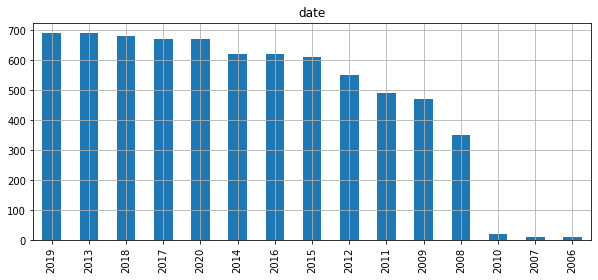

US    140
DE    130
FR    120
NZ    120
PL    120
     ... 
LK     10
VE     10
SV     10
DO     10
HN     10
Name: geo, Length: 80, dtype: int64


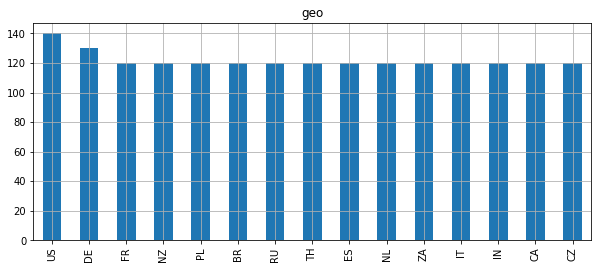

In [83]:
features_general = ['title','date', 'geo']

for f in features_general:
    print(df[f].value_counts())
    # Plot top 15
    plt.figure(figsize=(10,4))
    df[f].value_counts()[0:15].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

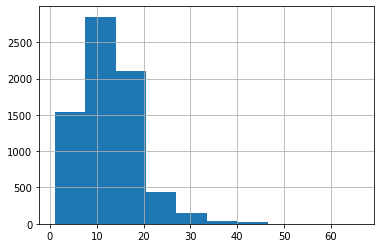

In [85]:
df.title_len.hist();

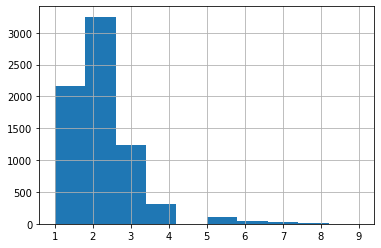

In [86]:
df.title_word_count.hist();

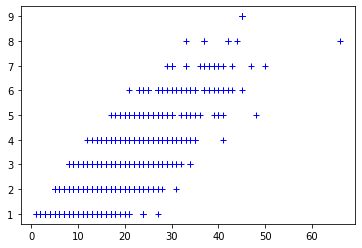

In [88]:
plt.plot(df.title_len,df.title_word_count,'b+');

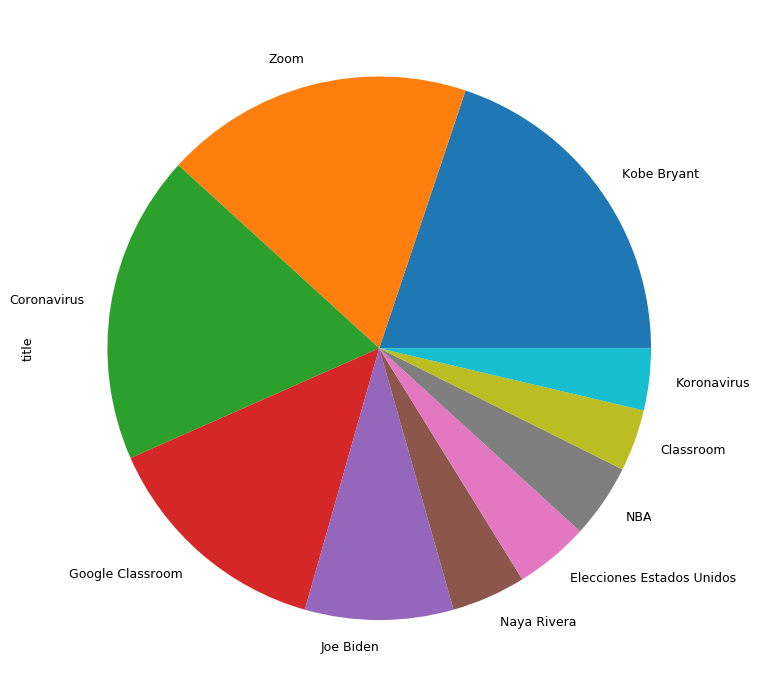

In [50]:
# TOP 10 searches of 2020
figure(figsize=(12, 10), dpi=90)
df[df.date == 2020].title.value_counts()[:10].plot.pie();

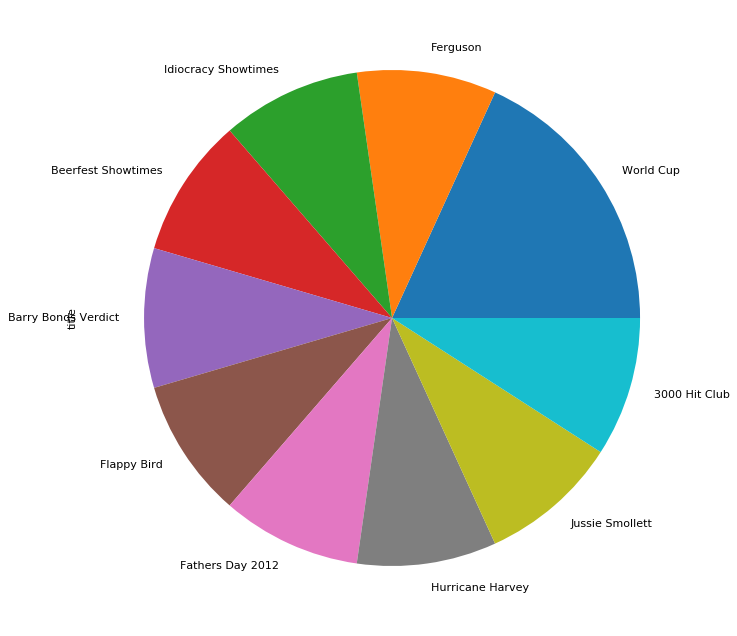

In [79]:
#TOP 10 seach title US
figure(figsize=(10, 16), dpi=80)
df[df.geo == 'US'].title.value_counts()[:10].plot.pie();

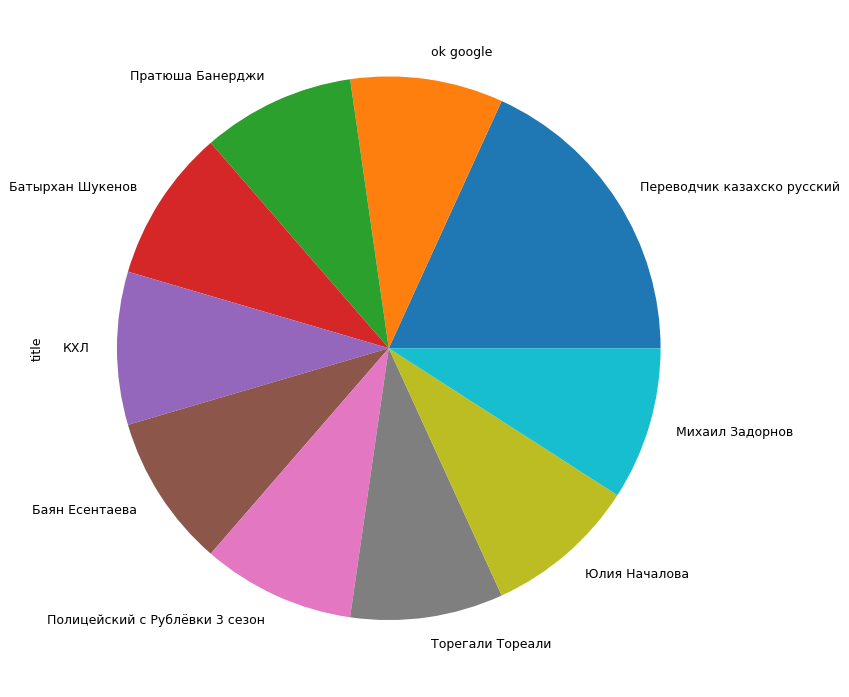

In [54]:
# TOP 10 search in Kazakhstan
figure(figsize=(12, 10), dpi=90)
df[df.geo == 'KZ'].title.value_counts()[:10].plot.pie();

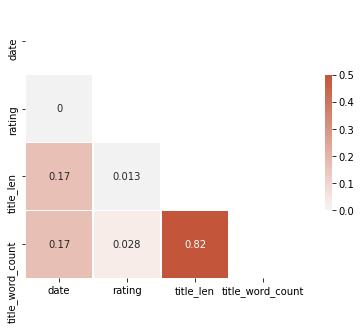

In [90]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);

In [74]:
print(df['title'].value_counts()[0:50].index.tolist())

['Facebook', 'Kobe Bryant', 'Donald Trump', 'Robin Williams', 'Zoom', 'Coronavirus', 'Avicii', 'Meghan Markle', 'Thanos', 'Google Classroom', 'Hotmail', 'iPhone 7', 'iPhone 8', 'Paul Walker', 'Pokemon Go', 'iPhone 5', 'YouTube', 'Stan Lee', 'Cameron Boyce', 'David Bowie', 'Euro 2016', 'Twitter', 'World Cup', 'iPhone 6', 'Copa América', 'Fortnite', 'Taringa', 'Joe Biden', 'Charlie Hebdo', 'Tour de France', 'Jennifer Lawrence', 'Ebola', 'Brexit', 'Notre Dame', 'Eurovision', 'Michael Jackson', 'Despacito', 'Amy Winehouse', 'Agario', 'Flappy Bird', 'Adele', 'Lady Gaga', 'Rugby World Cup', 'Prince', 'iPhone 11', 'US election', 'Joker', 'Claudio Bravo Camus', 'Olympics', 'iPhone X']
